<div style="border:solid green 3px; padding: 20px">
<b>🥇 Cпасибо за доработки, проект принят, молодец!</b>
    
Уверен, ты обязательно достигнешь своей цели! Успехов в дальнейшем обучении! 🙂
    

# Анализ данных интернет-магазина "Стримчик"

Проанализируем данные и проверим некоторые гипотезы, которые могут помочь запланировать кампанию на 2017-й год.

Ход исследования:

В нашем распоряжении имеется файл (/datasets/games.csv), содержащий данные о продаваемых играх и их рейтингу:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Исследование пройдет в шесть этапов:
1. Загрузка данных
2. Подготовка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя каждого региона 
5. Проверка гипотез
6. Общий вывод

## Загрузка данных

##### Загрузка библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
from random import randint
from scipy import stats as st
from math import sqrt

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Правильно, что импортируешь все библиотеки в отдельной ячейке!  </div>

##### Загрузка CSV-файла

In [2]:
try:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
except:
    games = pd.read_csv('/datasets/games.csv') 

##### Общая информация о датафрейме

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#провеерка на явные дубликаты
games.duplicated().sum()

0

In [5]:
#проверка на пропуски в столбцах
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


##### Общие гистограммы

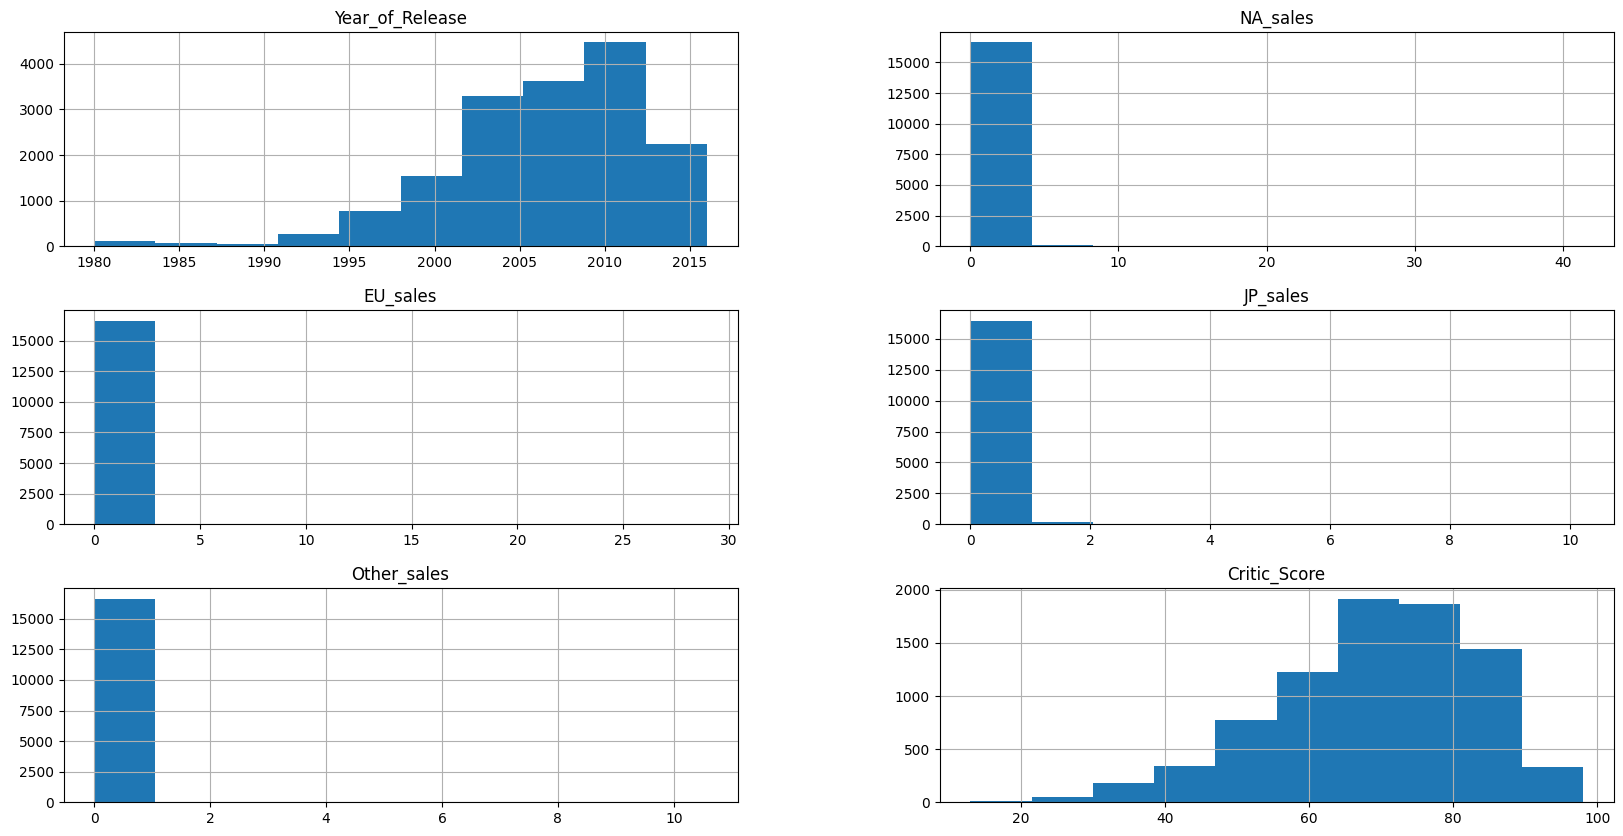

In [7]:
games.hist(figsize=(20, 10));

##### Вывод

В загруженном датафрейме 16715 строк и 11 столбцов. Явные дубликаты отстутствуют. Явных выбросов не наблюдается.

Замечания:
* Названия столбцов следует изменить в нижний регистр
* 4 столбца имеют неверный тип данных (Year_of_Release, User_Score, Rating)
* В 6 столбцах имеются пропущенные значения (Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating)


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Отлично, с данными познакомились!  </div>

## Подготовка данных

##### Заменим названия столбцов (приведите к нижнему регистру)

In [8]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

##### Детальная проверка на дубликаты

###### Проверка на неявные дубликаты столбца name

In [9]:
#list(games['name'].unique())
games['name'].duplicated().sum()

5155

In [10]:
dup_pivot = games.pivot_table(index='name', values='platform', aggfunc='count')
dup_pivot.columns = ['количество_повторений']
dup_pivot['количество_повторений'].max()
dup_pivot.query('количество_повторений == 12')

,количество_повторений
name,
Need for Speed: Most Wanted,12


In [11]:
games.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Дубликаты в столбце name присутствуют потому, что игра выпускалась одновременно для нескольких приставок, либо перевыпускалась в другой год для одной и той же платформы.

###### Проверка на неявные дубликаты столбца platform, year_of_release, genre, rating

In [12]:
sorted(games['platform'].unique(), reverse=True)

['XOne',
 'XB',
 'X360',
 'WiiU',
 'Wii',
 'WS',
 'TG16',
 'SNES',
 'SCD',
 'SAT',
 'PSV',
 'PSP',
 'PS4',
 'PS3',
 'PS2',
 'PS',
 'PCFX',
 'PC',
 'NG',
 'NES',
 'N64',
 'GG',
 'GEN',
 'GC',
 'GBA',
 'GB',
 'DS',
 'DC',
 '3DS',
 '3DO',
 '2600']

In [13]:
sorted(games['year_of_release'].unique(), reverse=True)

[2016.0,
 2015.0,
 2014.0,
 2013.0,
 2012.0,
 2011.0,
 2010.0,
 2009.0,
 2008.0,
 2007.0,
 2006.0,
 2005.0,
 2004.0,
 2003.0,
 2002.0,
 2001.0,
 2000.0,
 1999.0,
 1998.0,
 1997.0,
 1996.0,
 1994.0,
 1993.0,
 nan,
 1995.0,
 1992.0,
 1991.0,
 1990.0,
 1989.0,
 1988.0,
 1987.0,
 1986.0,
 1985.0,
 1984.0,
 1983.0,
 1982.0,
 1981.0,
 1980.0]

In [14]:
list(games['genre'].unique())

['Sports',
 'Platform',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Misc',
 'Shooter',
 'Simulation',
 'Action',
 'Fighting',
 'Adventure',
 'Strategy',
 nan]

In [15]:
list(games['rating'].unique())

['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP']

###### Проверка на неявные дубликаты в комбинации столбцов - 'name', 'platform', 'year_of_release'

In [16]:
games[games.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [17]:
games.query('name == "Madden NFL 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Один дубликат всё же нашелся. Это Madden NFL 13, выпущенный на PS3. Избавимся от него методом drop_duplicates. Заодно это должно избавить от одно пропущенного значения в столбцах name и genre, которых было по 2. Избавимся от остальных в следующем разделе обработки пропусков.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Отлично!  </div>

In [18]:
games = games.drop_duplicates(['name', 'platform', 'year_of_release'])
games.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

##### Обработаем пропуски

Я специально поставил раздел обработки пропусков первее. По мне логичнее сначала принять решение с пропусками, а затем, исходя из этого, изменять тип данных по столбцам. 

###### name, year_of_release

В столбце name остался 1 пропуск. Удалим его при помощи dropna

In [19]:
games = games.dropna(subset=['name']).reset_index(drop=True)
games.isna().sum()
# В столбце genre пропущенное значение также ликвидировалось. 

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [20]:
games['year_of_release'].isna().sum() / len(games['year_of_release'])

0.016096218286261368

В столбце year_of_release 269 пропущенных значений, что составляет 1,6% от общего кол-ва значений. Избавление от данных строк не сильно повлияет на результаты исследования.

In [21]:
games = games.dropna(subset=['year_of_release']).reset_index(drop=True)
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [22]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       9838 non-null   object 
 10  rating           9767 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


###### critic_score, user_score

In [23]:
#столбец user_score имеет тип данных object, значит в нем содержатся не только числовые значения. Проверим.
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Имеется значение tbd. Эта абревиатура означает - "to be defined", т.е. "не определено", что можно сравнить просто с пропущенным значением. Заменим tbd на числовой nan и далее решим как поступить с пропусками.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Верное решение.</div>

In [24]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = float('nan')
#games['user_score'].unique() #проверил

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 

В качестве пропуска можно взять `numpy.nan` из библиотеки `numpy`</div>

In [25]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [26]:
games['critic_score'].isna().sum() / len(games['critic_score'])

0.5145654685884571

In [27]:
games['user_score'].isna().sum() / len(games['user_score'])

0.5461898680289485

Пропуски в обеих столбцах составляют около половины данных. Удалить мы их не можем, потеряв большой объем данных. Половина значений с средним или медианой также будут показывать нам искаженную динамику в нашем исследовании. Принято решение оставить пропуски как есть, сообщив колегам о данной проблеме.

###### rating

In [28]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Для начала изучим информацию о категориях, имеющуюся в свободном доступе. 

* **EC** :	Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует.
* **E** : 	Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика.
* **E 10+** :	Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. 
* **T** :	Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.
* **M** :	Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков.
* **AO** :	Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности.
* **RP** :	Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

Категория RP означает что категория не присвоена. Возможно по этой же причине появились пропуски. Можем заменить все NaN на RP. 

In [29]:
games['rating'] = games['rating'].fillna('RP')
#games['rating'].unique() #проверил

Также я не обнаружил описания категории K-A в списке. На портале (https://videogamegeek.com/videogamerating/2220/esrb-k-a) нашел следующую информацию: **'K-A for Kids to Adults: Games that contain content that is suitable for a general audience. This rating was used until the year 1998 when it renamed to E.'**
Это означает, что категория K-A в настоящий момента не актуальна и была переименована в категорию E. В связи с этим поменяем значения 'K-A' на 'E'.

In [30]:
games['rating'] = games['rating'].replace('K-A', 'E', regex=True)
games['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

In [31]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

##### Преобразуем данные в нужные типы

In [32]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   object 
 10  rating           16443 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [33]:
# year_of_release преобразуем в int, т.к. все значения без дробной части.
games['year_of_release'] = games['year_of_release'].astype('int')
# user_score поменяем на float64, как было решено в предыдущем разделе.
games['user_score'] = games['user_score'].astype('float64')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


##### Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец

In [34]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 
    
Еще тут можно использовать метод `DataFrame.sum` с аргументом `axis=1`</div>

```python

        df['total_sum'] = df[['value_1', 'value_2', 'value_3', 'value_4']].sum(axis=1)
    
```

##### Вывод

В процессе подготовки данных были проделаны следующие действия:
* Привели названия столбцов н нижнему регистру. 
* Проверили все столбцы на неявные дубликаты. 1 был найден и удален.
* Удалены  строки с пропусками в столбцах name, year_of_release, genre. В столбце rating пропуски заменены на категорию RP. Пропуски в critic_score и user_score оставили без изменений, т.к. они занимают больше половины имеющихся данных. 
* Столбцы year_of_release и user_score были приведены к нужным типам.
* Создали новый столбец, показывающий суммарные продажи во всех регионах.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Предобработка данных проведена успешно! Можно приступать к исследованию)</div>

## Исследовательский анализ данных

##### Посмотрим сколько игр выпускалось в разные годы. Важны ли данные за все периоды. 

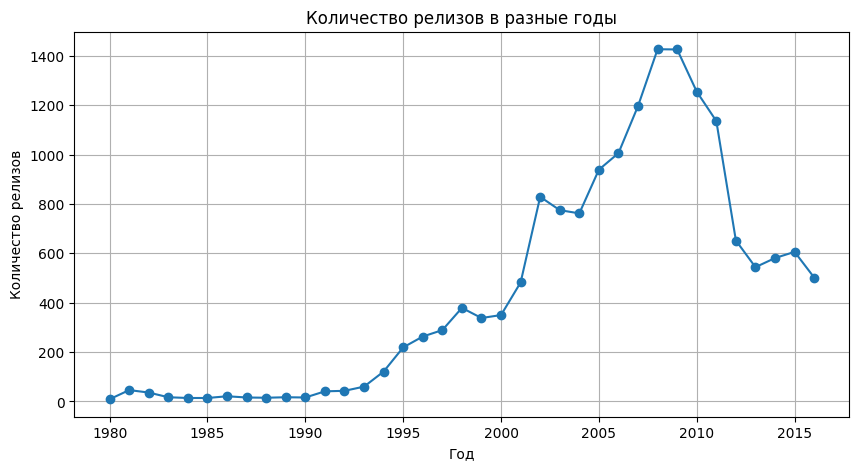

In [35]:
# воспользуемся методом сводных таблиц
year_release = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
# year_release
year_release.plot(style='-o', figsize=(10,5), grid=True, title='Количество релизов в разные годы', xlabel='Год', ylabel='Количество релизов', legend='');

In [36]:
year_release.describe()

,name
count,37.000000
mean,444.405405
std,451.591535
min,9.000000
25%,36.000000
50%,338.000000
75%,762.000000
max,1427.000000


Видно, что наибольшее количество, выпущенных игр за 36 лет, приходится на период с 2005 по 2011 года. Максимальное количество игр выпущено в 2008 году и составляет 1427. 

##### Посмотрим , как менялись продажи по платформам.

###### Общий вид продаж

In [37]:
platform_sales = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index()
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)
platform_sales

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.33
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


По сводной таблице видим 6 явных лидеров

###### Сделаем список TOP-6

In [38]:
# Нашел интересную функцию, которая помогает сформировать TOP список по нужному количеству. Позволяет также найти TOP самых маленьких значений через nsmallest.
top6_platform_sales = platform_sales.nlargest(n=6, columns='total_sales').reset_index(drop=True) 
top6_platform_sales

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58


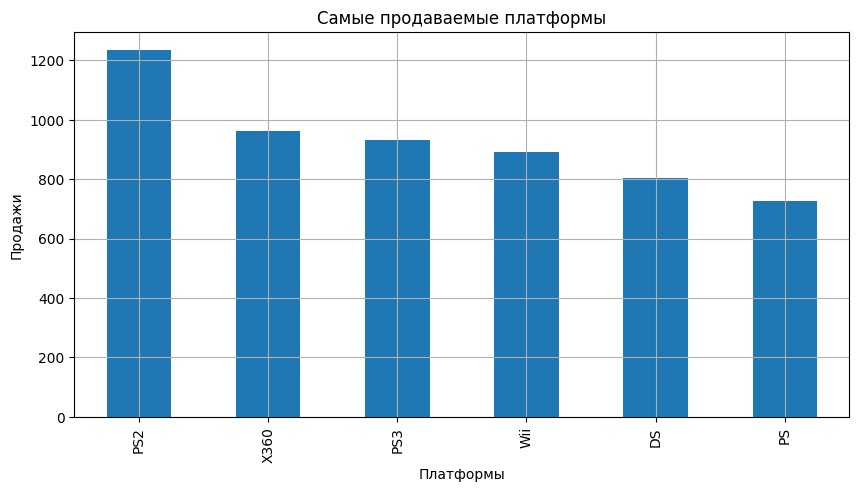

In [39]:
top6_platform_sales.plot(kind='bar', x='platform', y='total_sales', figsize=(10,5), grid=True, title='Самые продаваемые платформы', xlabel='Платформы', ylabel='Продажи', legend='');

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Очень хорошо ,что подписываешь графики и оси! </div>

###### Построим распределение по годам

In [40]:
top6_platforms = top6_platform_sales['platform']

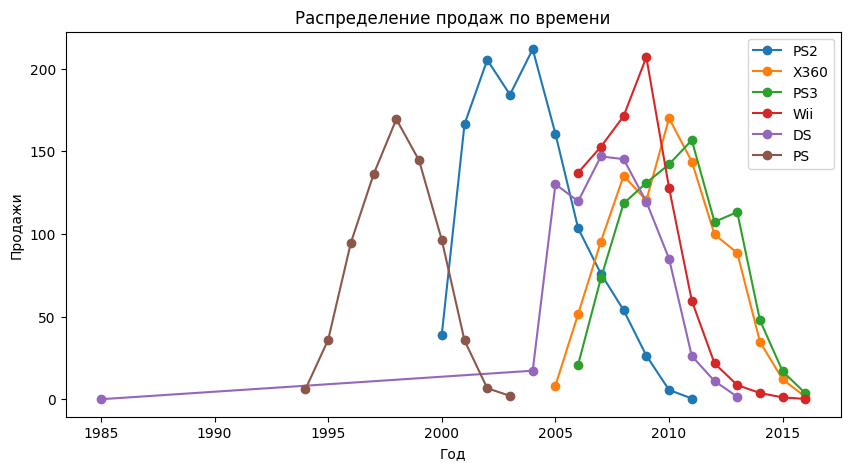

In [41]:
for t in top6_platforms:
    games[games['platform'] == t].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)['total_sales'].plot(style='-o', figsize=(10,5), label=t, title='Распределение продаж по времени', xlabel='Год', ylabel='Продажи', legend=True)

В целом у всех платформ, за исключением Wii, прослеживается классический жизненный цикл 'набор оборотов продаж -> пик -> падение продаж'. В отличии от всех у Wii был достаточно 'взрывной' старт продаж, что видно по графику.

По графику DS замечена аномальность - игра 1985 года при том, что сама консоль была выпущена лишь в 2004 году. Необходимо ее найти и удалить, т.к. она сильно искажает динамику.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 

Все верно.
</div>

In [42]:
games.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,RP,0.02


In [43]:
games = games[games['name'] != 'Strongest Tokyo University Shogi DS']

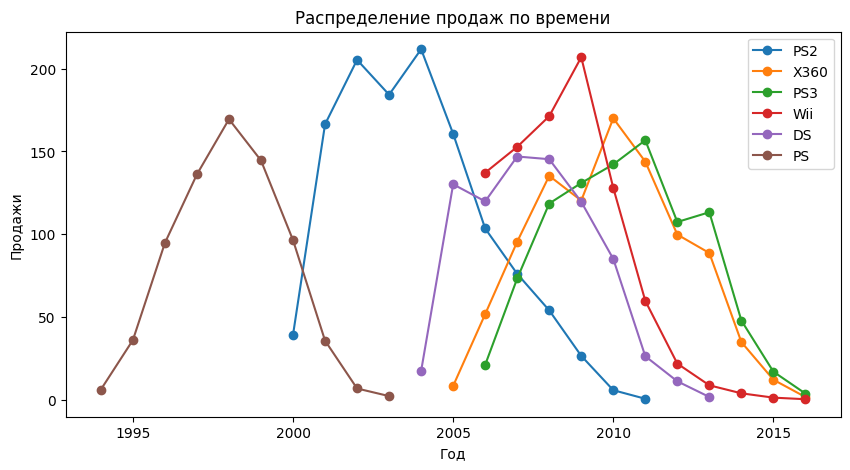

In [44]:
for t in top6_platforms:
    games[games['platform'] == t].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)['total_sales'].plot(style='-o', figsize=(10,5), label=t, title='Распределение продаж по времени', xlabel='Год', ylabel='Продажи', legend=True)

###### За какой характерный срок  исчезают старые платформы

In [45]:
#создадим функцию, которая поможет нам при сводной таблице создать отдельный столбец с разницей последнего года продаж и начального года продаж, тем самым показав нам период продаж
def format_mean(games):
    return games.max() - games.min()

In [46]:
# создаем pivot и сбрасываем индекс, чтобы перечень платформ превратился в столбец для возможности дальнейшей фильтрации.
platform_lifecycle_pivot = games.pivot_table(index='platform', values= 'year_of_release', aggfunc=['min', 'max', format_mean]).reset_index()
platform_lifecycle_pivot.columns = ['platform', 'старт_продаж', 'конец_продаж', 'период_продаж']
platform_lifecycle_pivot

,platform,старт_продаж,конец_продаж,период_продаж
0,2600,1980,1989,9
1,3DO,1994,1995,1
2,3DS,2011,2016,5
3,DC,1998,2008,10
4,DS,2004,2013,9
5,GB,1988,2001,13
6,GBA,2000,2007,7
7,GC,2001,2007,6
8,GEN,1990,1994,4
9,GG,1992,1992,0


<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
Такой расчет не очень корректен, например, если платформа существовала с 2010 по 2012 годы, то у тебя получится 2012 - 2010 = 2, хотя на самом деле: 2010, 2011 и 2013, то есть 3 года.
Ниже показал пример как проще и корректнее посчитать среднюю продолжительность жизни платформ.</div>

In [47]:
# код ревьюера
games.groupby('platform')['year_of_release'].nunique().mean()

7.645161290322581

In [48]:
# Отсечем платформы, которые продаются по сей год и те, которые не продержались и года.
platform_lifecycle_died = platform_lifecycle_pivot.query('конец_продаж < 2016 & период_продаж != 0')
platform_lifecycle_died.sort_values(by='период_продаж', ascending=False).reset_index()

,index,platform,старт_продаж,конец_продаж,период_продаж
0,5,GB,1988,2001,13
1,11,NES,1983,1994,11
2,19,PSP,2004,2015,11
3,16,PS2,2000,2011,11
4,3,DC,1998,2008,10
5,15,PS,1994,2003,9
6,23,SNES,1990,1999,9
7,0,2600,1980,1989,9
8,4,DS,2004,2013,9
9,29,XB,2000,2008,8


In [49]:
platform_lifecycle_died['период_продаж'].describe()

count    19.000000
mean      7.105263
std       3.634629
min       1.000000
25%       4.500000
50%       8.000000
75%       9.500000
max      13.000000
Name: период_продаж, dtype: float64

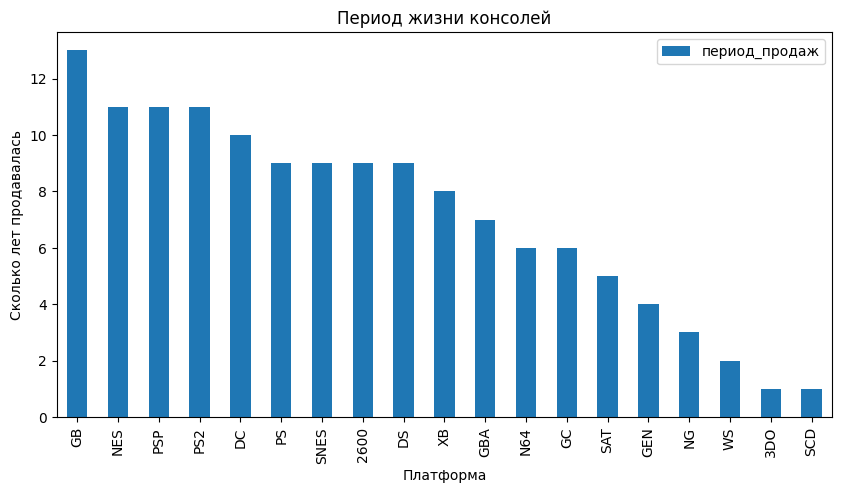

In [50]:
platform_lifecycle_died.sort_values(by='период_продаж', ascending=False).plot(kind='bar', x='platform', y='период_продаж', figsize=(10,5), title='Период жизни консолей', xlabel='Платформа', ylabel='Сколько лет продавалась');

Среднее значение продолжительности жизни консоли - 7.1 лет. 

С наибольшим жизненным циклом выделяются платформы: GB - 13 лет, NES - 11 лет , PS2 - 11 лет, PSP - 11 лет, DC - 10 лет. Можно проанализировать каждую из них:
* GB(GameBoy) и PSP(Playstation Portable) относятся к категории портативных приставок, поэтому на них не так сильно влияет графический прогресс. Пользователи с удовольствием играют на них в игры с устаревшей графикой и по сей день. Главное преимущество - платформа позволяет им приятно скоротать время за игрой в любом месте и в любых обстоятельствах, т.к. работает от аккумулятора и имеет свой дисплей прямо на устройстве.
* NES - 8-ми битная "прорывная" платформа от компании Nintendo именно для своего времени (1983-1994). В то время у нее не было достойных конкурентов, в связи с чем наблюдается высокий уровень продаж.
* DC (Dreamcast) - прекрасная платформа от компании Sega, вышедшая в свет в 1998 году. На ее продажи и жизненный цикл сильно повлияла платформа PS2 от конкурирующей компании Sony, которая постепенно вытеснила первую с рынка продаж. Не смотря на это, обе платформы продержались на рынке 10 и 11 лет соответственно, но при этом с огромной разницей в продажах (график ниже). 

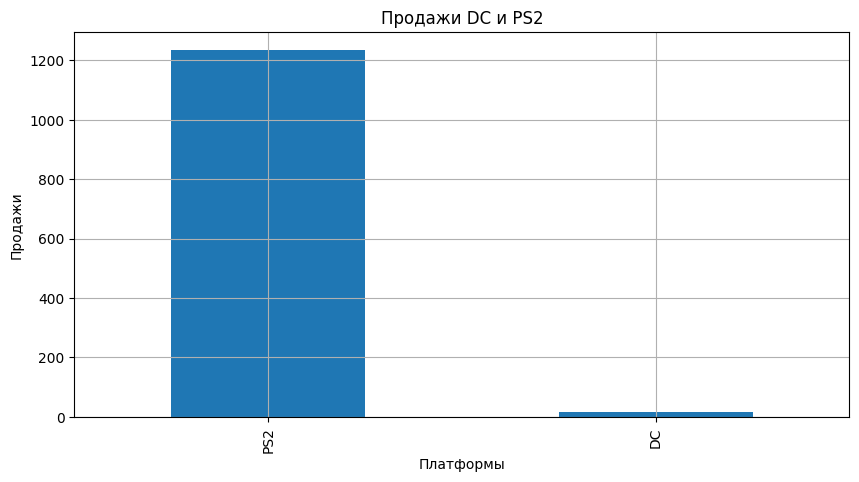

In [51]:
platform_sales.query('platform == ["DC", "PS2"]').plot(kind='bar', x='platform', y='total_sales', figsize=(10,5), grid=True, title='Продажи DC и PS2', xlabel='Платформы', ylabel='Продажи', legend='');

Здесь можем сделать вывод, что средняя продолжительности жизни платформ составляет примерно 7 лет. На этот показатель влияют следующие факторы: 
* портативность
* технический прогресс
* влияние конкурентов
* политика производителя платформы

###### За какой характерный срок появляются новые  платформы

Думаю, имеет смысл взглянуть на появление новых платформ внутри групп отдельных производителей. Для этого определим по несколько стационарных (не портативных) платформ у 3 крупнейших производителей:
* Nintendo - NES, SNES, N64, Wii
* SEGA - Gen, SAT, DC, SCD
* Sony - PS, PS2, PS3, PS4

In [52]:
# Сделаем функцию категоризации и применим к сводной таблице platform_lifecycle_pivot
def categorize_company(platform):
    try:
        if platform == 'NES' or platform == 'SNES' or platform == 'N64' or platform == 'Wii':
            return 'Nintendo'
        elif platform == 'GEN' or platform == 'SAT' or platform == 'DC' or platform == 'SCD':
            return 'SEGA'
        elif platform == 'PS' or platform == 'PS2' or platform == 'PS3' or platform == 'PS4':
            return 'Sony'
        else:
            return 'no_category'
    except:
        pass

platform_lifecycle_pivot['company'] = platform_lifecycle_pivot['platform'].apply(categorize_company)

# Сделаем срезы по компаниям, чтобы было удобнее показать хронологию
company_platform_lifecycle_nintendo = platform_lifecycle_pivot.query('company == "Nintendo"')
company_platform_lifecycle_sega = platform_lifecycle_pivot.query('company == "SEGA"')
company_platform_lifecycle_sony = platform_lifecycle_pivot.query('company == "Sony"')

# Сделаем отдельный пивот для каждой компании
# Nintendo
company_platform_lifecycle_nintendo_pivot = company_platform_lifecycle_nintendo.pivot_table(index=['company', 'platform'], values=['старт_продаж'], aggfunc='min').sort_values(by='старт_продаж')
# Нашел функцию .diff(1), которая позволяет создать столбец с разницей значения одного столбца с предыдущим.
company_platform_lifecycle_nintendo_pivot['время до появления платформы'] = company_platform_lifecycle_nintendo_pivot['старт_продаж'].diff(1)

# SEGA
company_platform_lifecycle_sega_pivot = company_platform_lifecycle_sega.pivot_table(index=['company', 'platform'], values=['старт_продаж'], aggfunc='min').sort_values(by='старт_продаж')
company_platform_lifecycle_sega_pivot['время до появления платформы'] = company_platform_lifecycle_sega_pivot['старт_продаж'].diff(1)
# Sony
company_platform_lifecycle_sony_pivot = company_platform_lifecycle_sony.pivot_table(index=['company', 'platform'], values=['старт_продаж'], aggfunc='min').sort_values(by='старт_продаж')
company_platform_lifecycle_sony_pivot['время до появления платформы'] = company_platform_lifecycle_sony_pivot['старт_продаж'].diff(1)

In [53]:
company_platform_lifecycle_nintendo_pivot

старт_продаж  время до появления платформы
company  platform                                            
Nintendo NES               1983                           NaN
         SNES              1990                           7.0
         N64               1996                           6.0
         Wii               2006                          10.0

In [54]:
company_platform_lifecycle_nintendo_pivot.describe()

,старт_продаж,время до появления платформы
count,4.000000,3.000000
mean,1993.750000,7.666667
std,9.742518,2.081666
min,1983.000000,6.000000
25%,1988.250000,6.500000
50%,1993.000000,7.000000
75%,1998.500000,8.500000
max,2006.000000,10.000000


In [55]:
company_platform_lifecycle_sega_pivot

старт_продаж  время до появления платформы
company platform                                            
SEGA    GEN               1990                           NaN
        SCD               1993                           3.0
        SAT               1994                           1.0
        DC                1998                           4.0

In [56]:
company_platform_lifecycle_sega_pivot.describe()

,старт_продаж,время до появления платформы
count,4.000000,3.000000
mean,1993.750000,2.666667
std,3.304038,1.527525
min,1990.000000,1.000000
25%,1992.250000,2.000000
50%,1993.500000,3.000000
75%,1995.000000,3.500000
max,1998.000000,4.000000


In [57]:
company_platform_lifecycle_sony_pivot

старт_продаж  время до появления платформы
company platform                                            
Sony    PS                1994                           NaN
        PS2               2000                           6.0
        PS3               2006                           6.0
        PS4               2013                           7.0

In [58]:
company_platform_lifecycle_sony_pivot.describe()

,старт_продаж,время до появления платформы
count,4.00000,3.000000
mean,2003.25000,6.333333
std,8.13941,0.577350
min,1994.00000,6.000000
25%,1998.50000,6.000000
50%,2003.00000,6.000000
75%,2007.75000,6.500000
max,2013.00000,7.000000


У компании Nintendo замена на новые платформы хронологически происходила через 7, 6 и 10 лет. Среднее время обновления платформы - 7.6 лет.

У компании Sega замена на новые платформы хронологически происходила через 3, 1 и 4 года. через 4 года. Среднее время обновления платформы - 2.6 года.

У компании Sony замена на новые платформы хронологически происходила через 6, 6 и 7 лет. Среднее время обновления платформы - 6.3 года.

##### Определим соответствующий актуальный период.

Нас интересует актуальный период для исследования. Чтобы его определить, определим актуальные платформы(которые продаются по сей день) и посмотрим их динамику

In [59]:
actual_platforms = games.query('year_of_release == 2016')
actual_platforms['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

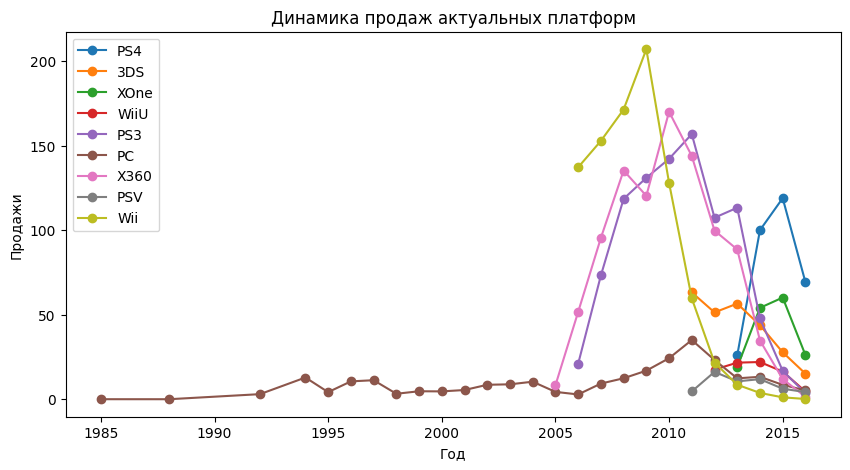

In [60]:
for t in actual_platforms['platform'].unique():
    games[games['platform'] == t].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)['total_sales'].plot(style='-o', figsize=(10,5), label=t, title='Динамика продаж актуальных платформ', xlabel='Год', ylabel='Продажи', legend=True)

🔁Оптимально актуальным периодом является 2014 - 2016 года, который позволит нам проанализировать платформы, возникшие не менее 3 лет назад и максимально отсечь устаревшие.

In [61]:
actual_games = games.query('2014 <= year_of_release <= 2016')
actual_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98


<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Тут все отлично и подробно рассмотрено, но актуальный период выбран немного больше чем нужно. В этот срез могут попасть уже неактуальные платформы.    

Учитывая высокую динамичность рынка, мы можем сделать вывод, что для дальнейшего анализа нам потребуются данные по платформам, возникшим не ранее 3 лет назад по отношению к 2017 году, на который нам нужно сделать прогноз и запланировать рекламные кампании. Так мы сможем выделить успешные платформы, которые на 2017 год будут находиться в периоде финального роста или выйдут на плато. </div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Денис, привет! Честно сказать, у меня была идея идея сделать срез с 2014 года, но почему то всё же решил охватить больше данных. Всё переделал на период 2014 <= year_of_release <= 2016 и обновил выводы соответственно во всех последующих разделах. Везде, где изменены выводы, я поставил 🔁.
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

##### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ

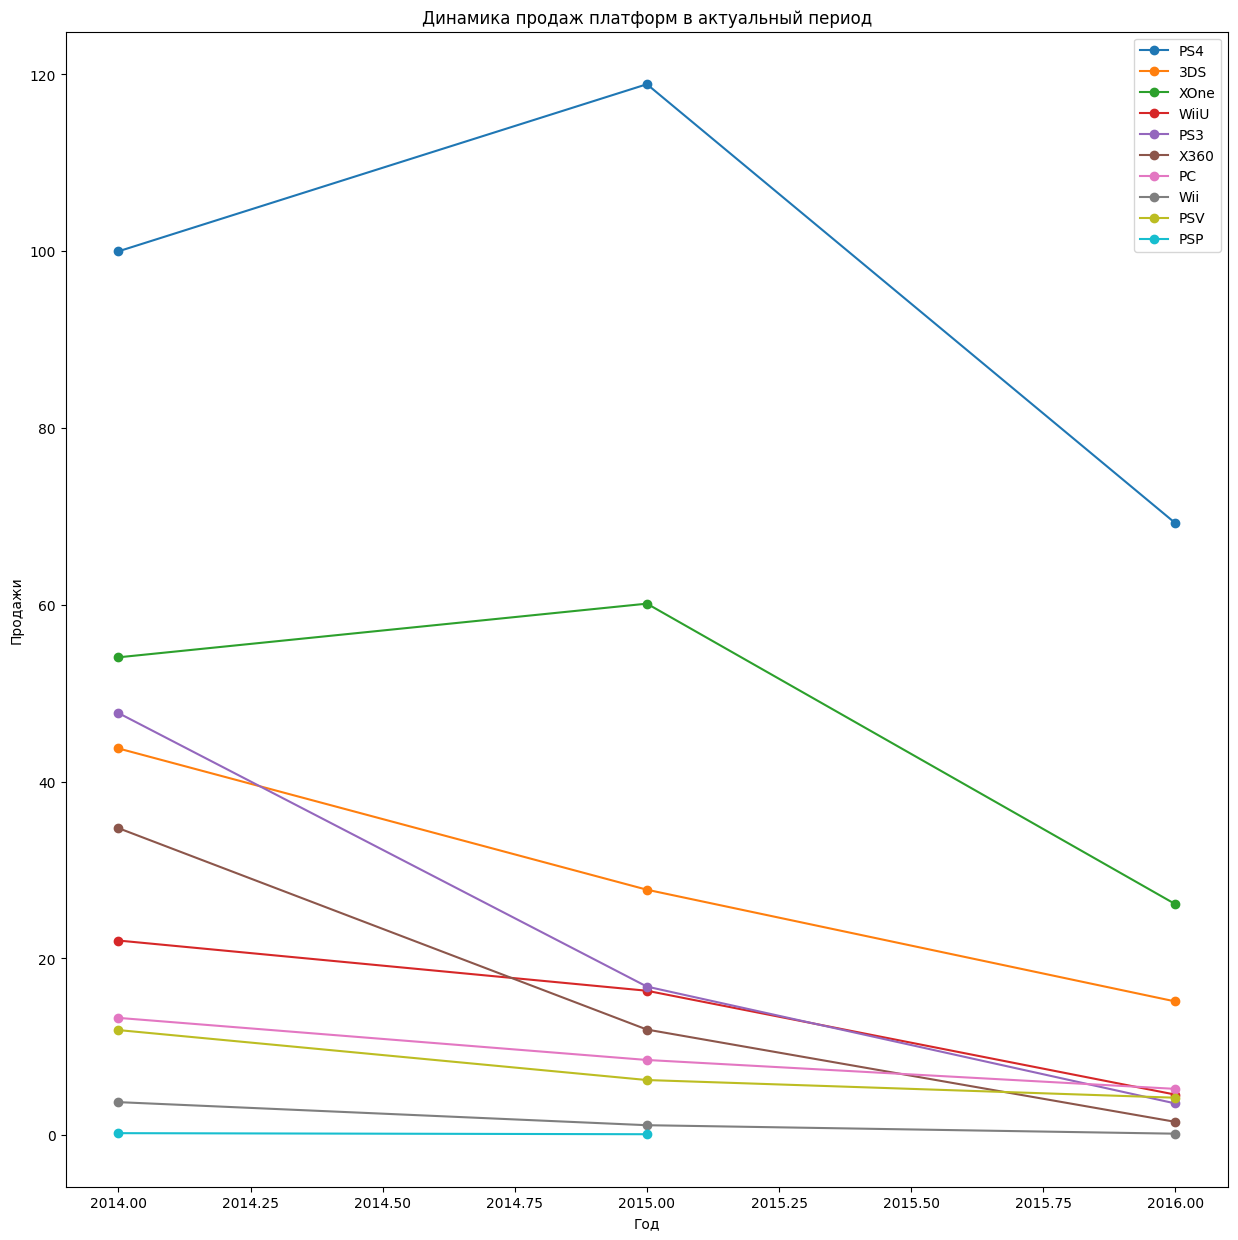

In [62]:
for t in actual_games['platform'].unique():
    actual_games[actual_games['platform'] == t].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)['total_sales'].plot(style='-o', figsize=(15,15), label=t, title='Динамика продаж платформ в актуальный период', xlabel='Год', ylabel='Продажи', legend=True)

По данным видно, что за актуальный период идет тенденция снижения продаж по всем платформам. Лидирующие позицию держат по убыванию: PS4, XOne, 3DS, PC, PSV и WiiU. Их мы определим как потенциально прибыльные платформы. 

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Разве все эти платформы можно назвать потенциально прибыльными? Следует обратить внимание на платформы, у которых динамика продаж не снижалась более одного года подряд. Помним при этом, что данные за 2016 год неполные.</div>

##### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [63]:
# оставим только потенциально прибыльные платформы
# potential_platforms = actual_games.query('platform in ["PS4", "XOne", "3DS", "PC", "PSV", "WiiU"]')
# 🔁 Убрал фильтрацию

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Далее нам нужно анализировать все данные из актуального периода, без дополнительных фильтраций по платформам. Это позволит нам убедиться в правильности выбора перспективных платформ и не допустить ошибок.
    
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Убрал фильтрацию и оставил по платформам и построи диаграммы размаха по всем платформам в новом актуальном периоде.
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

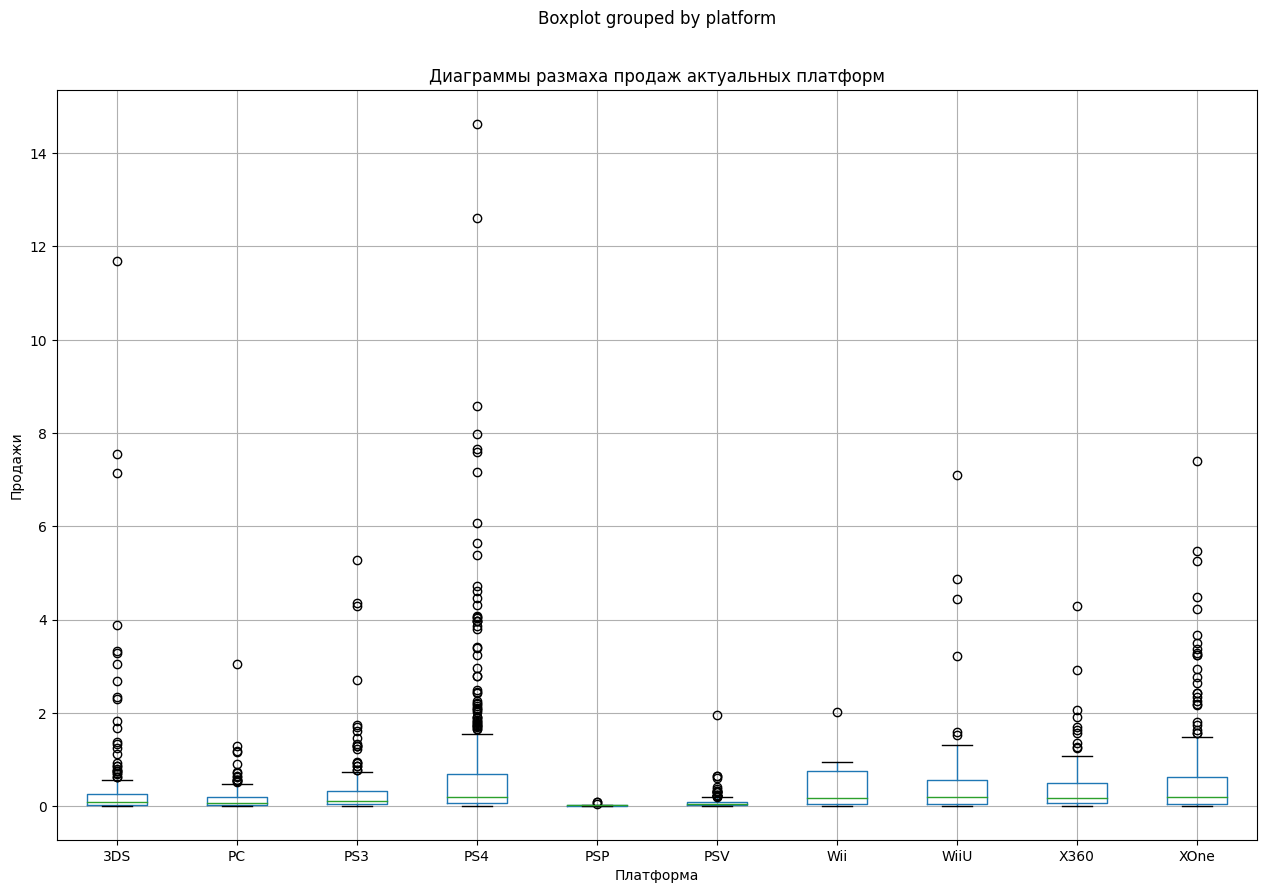

In [64]:
actual_games.boxplot(column='total_sales', by='platform', figsize=(15,10))
plt.title('Диаграммы размаха продаж актуальных платформ')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Тут лучше построить две визуализации. Одну не ограничивая продажи, чтобы рассмотреть выбросы, а на другой ограничить диапазон значений по оси у ,чтобы отчетливо рассмотреть сами боксплоты. </div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Убрал фильтрацию и оставил по платформам и построил диаграммы размаха по всем платформам в новом актуальном периоде.
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

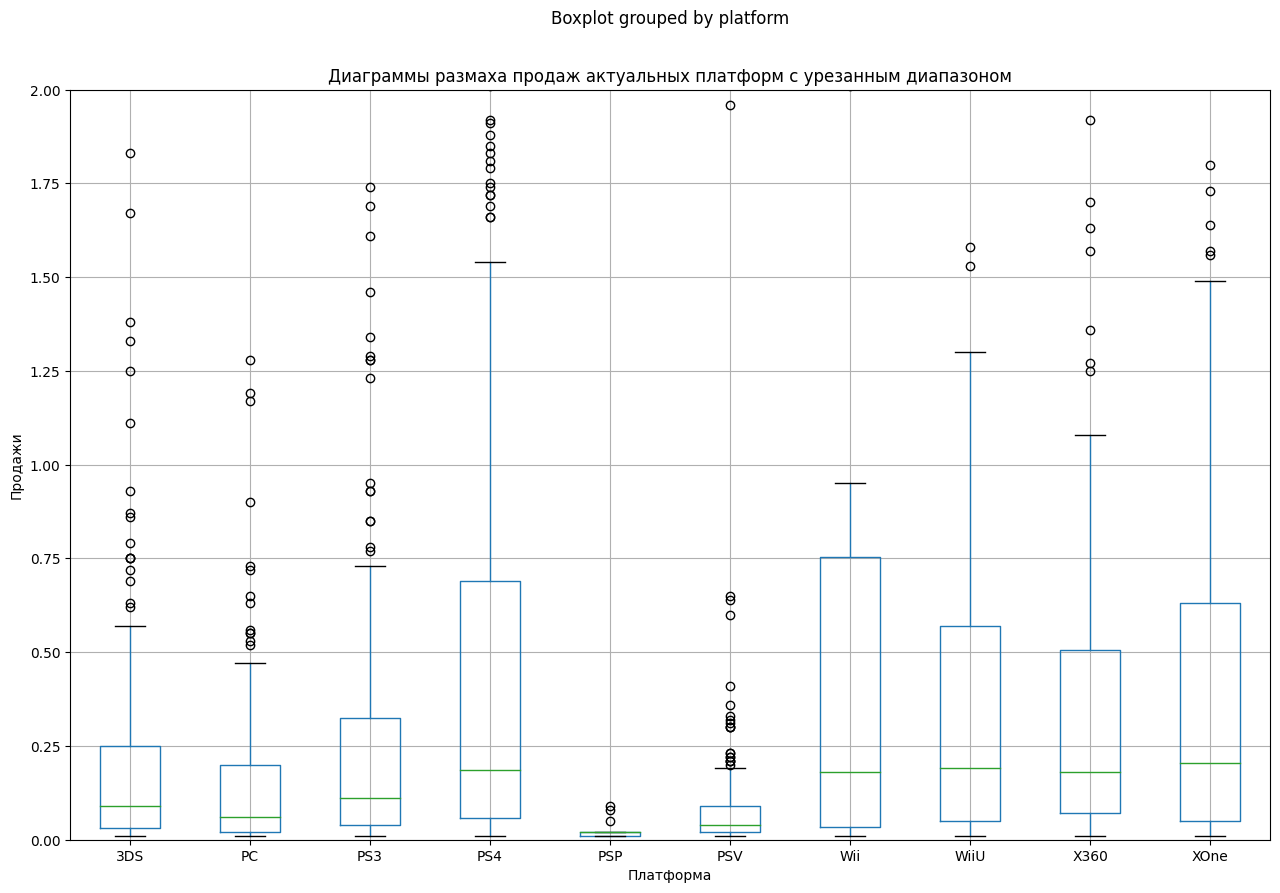

In [65]:
actual_games.boxplot(column='total_sales', by='platform', figsize=(15,10))
plt.title('Диаграммы размаха продаж актуальных платформ c урезанным диапазоном')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.ylim(0,2)
plt.show()

По диаграммам размаха видно множество значений вне квартильных значений. Это значит что у каждой из платформ есть игры с чрезмерно высоким уровнем продаж и игры c минимальными продажами. Самый низкий разброс значений четко виден у платформ PC и PSV. Ниже построим сводную таблицу (аналог функции describe по всем платформам), чтобы удостовериться в наблюдениях.

In [66]:
#🔁
actual_games_describe = actual_games.pivot_table(index='platform', values='total_sales', aggfunc=['sum', 'mean', 'median', 'count', 'min', 'max'])
actual_games_describe

,sum,mean,median,count,min,max
,total_sales,total_sales,total_sales,total_sales,total_sales,total_sales
platform,,,,,,
3DS,86.68,0.408868,0.090,212,0.01,11.68
PC,27.05,0.179139,0.060,151,0.01,3.05
PS3,68.18,0.311324,0.110,219,0.01,5.27
PS4,288.15,0.766356,0.185,376,0.01,14.63
PSP,0.36,0.027692,0.020,13,0.01,0.09
PSV,22.40,0.075932,0.040,295,0.01,1.96
Wii,5.07,0.460909,0.180,11,0.01,2.01
WiiU,42.98,0.588767,0.190,73,0.01,7.09


##### Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Для исследования возьмем самую популярную по продажам платформу - PS4

In [67]:
#🔁 сделаем срез таблицы с нужными нам столбцами, отфильтруем по PS4 и посчитаем корреляцию 
actual_games.loc[:,['platform', 'critic_score', 'user_score', 'total_sales']].query('platform == "PS4"').corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.546434,0.402661
user_score,0.546434,1.000000,-0.040132
total_sales,0.402661,-0.040132,1.000000


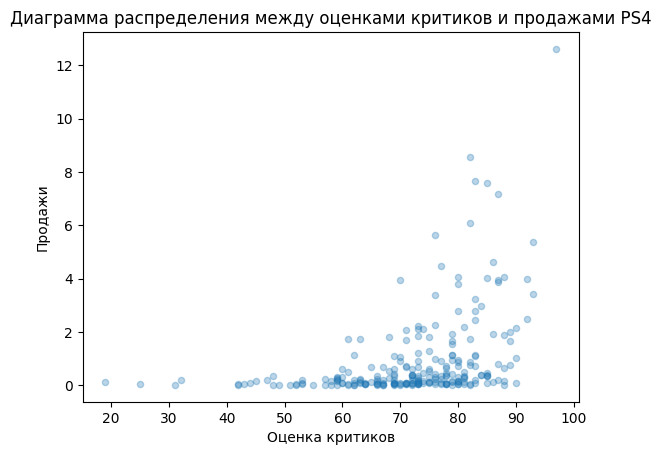

In [68]:
actual_games.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, title='Диаграмма распределения между оценками критиков и продажами PS4', xlabel='Оценка критиков', ylabel='Продажи');

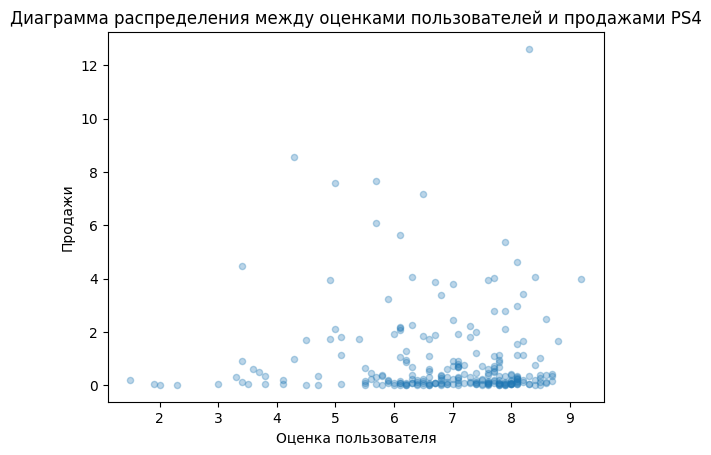

In [69]:
actual_games.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, title='Диаграмма распределения между оценками пользователей и продажами PS4', xlabel='Оценка пользователя', ylabel='Продажи');

* Наблюдается небольшая взаимосвязь между количеством продаж PS4 и оценками критиков (0.4), которую стоит учитывать. 
* Взаимосвязи между количеством продаж PS4 и оценками критиков не наблюдается (-0.04).

##### Соотнесем выводы с продажами игр на других платформах.

🔁 Построим небольшие функции для построения диаграмм размаха и рассчета корреляций еще для 3 платформ.

In [70]:
other_platforms = ['WiiU', 'XOne', '3DS']

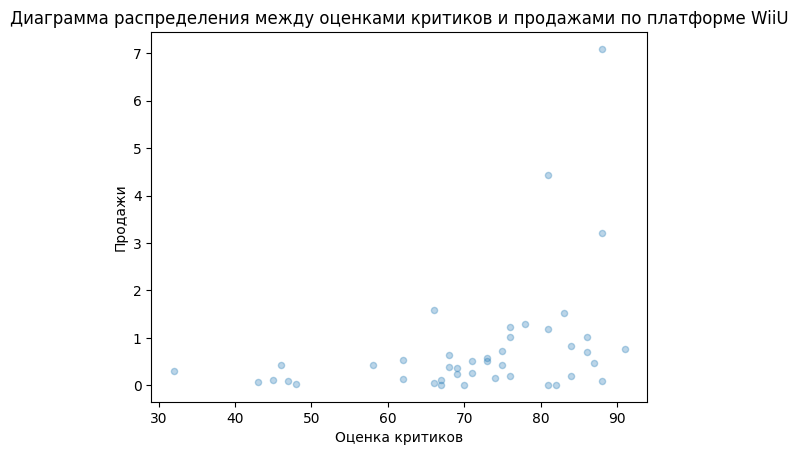

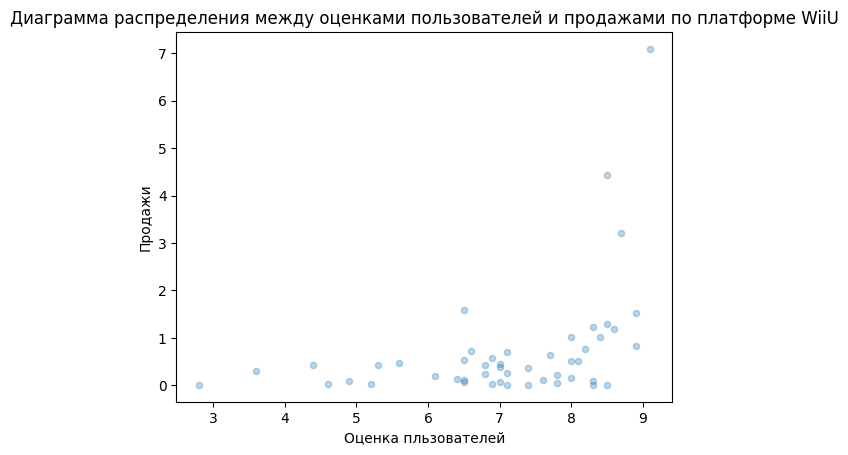

              critic_score  user_score  total_sales
critic_score      1.000000    0.763536     0.370201
user_score        0.763536    1.000000     0.407926
total_sales       0.370201    0.407926     1.000000


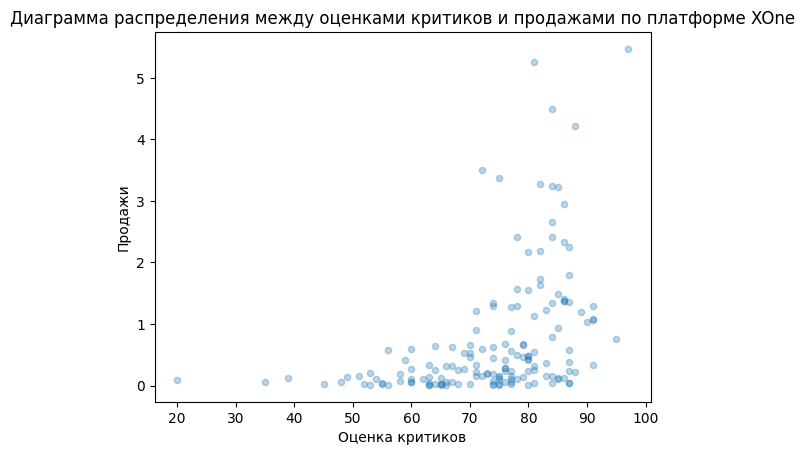

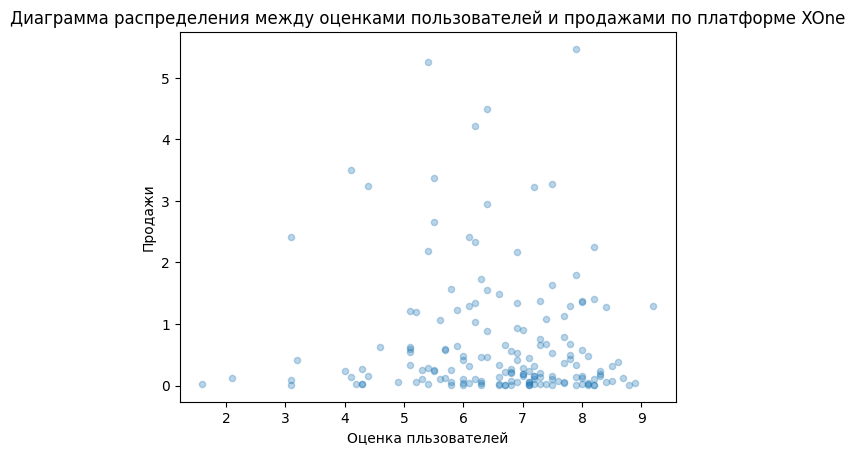

              critic_score  user_score  total_sales
critic_score      1.000000    0.440977     0.428677
user_score        0.440977    1.000000    -0.070384
total_sales       0.428677   -0.070384     1.000000


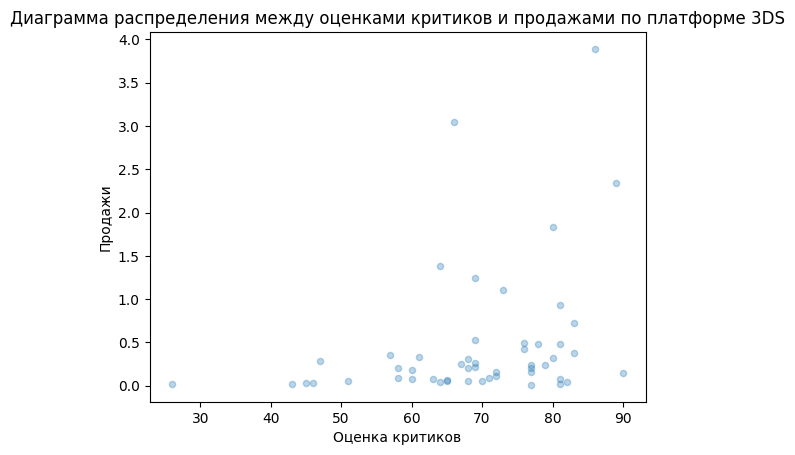

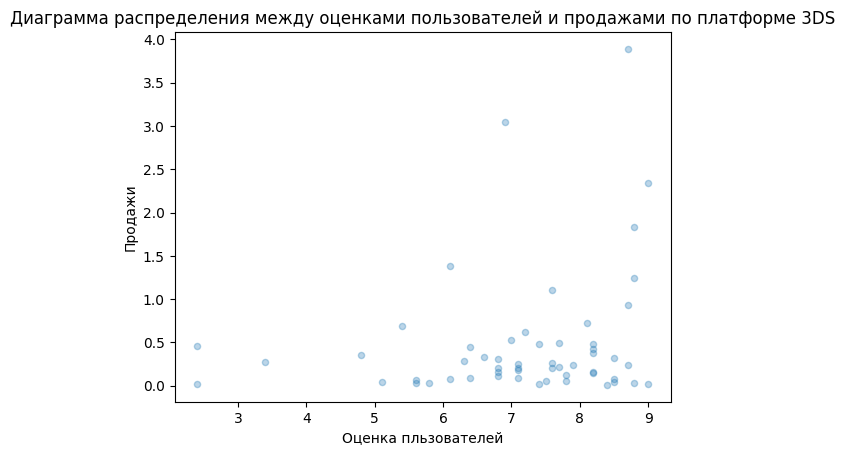

              critic_score  user_score  total_sales
critic_score      1.000000    0.862485     0.314117
user_score        0.862485    1.000000     0.215193
total_sales       0.314117    0.215193     1.000000


In [71]:
for i in other_platforms:
    actual_games.query('platform == @i').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)
    plt.title(f'Диаграмма распределения между оценками критиков и продажами по платформе {i}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи')
    plt.show()
    
    actual_games.query('platform == @i').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)
    plt.title(f'Диаграмма распределения между оценками пользователей и продажами по платформе {i}')
    plt.xlabel('Оценка пльзователей')
    plt.ylabel('Продажи')
    plt.show()
    
    print(actual_games.loc[:,['platform', 'critic_score', 'user_score', 'total_sales']].query('platform == @i').corr())
 

🔁 Похожая тенденция наблюдается и для платформ 3DS и XOne , а вот у WiiU напротив имеется неплохая взаимосвязь продаж с оценками пользователей (0.4)


<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Чтобы сделать итоговый вывод о зависимости продаж от оценок, нам нужно рассмотреть еще как минимум 3 платформы подобным образом (как PS4). Так как код будет повторяться, его можно выполнять в цикле или написать небольшую функцию.
    
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Исследования через функцию по 3 платформам добавлены. Вывод исправлен
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

##### Посмотрим на общее распределение игр по жанрам.

In [72]:
genre_pivot = actual_games.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count', 'median'])
genre_pivot.columns = ['total_sales_sum', 'games_count', 'total_sales_median']
genre_pivot.sort_values(by='total_sales_sum', ascending=False)

,total_sales_sum,games_count,total_sales_median
genre,,,
Action,199.36,619,0.090
Shooter,170.94,128,0.515
Sports,109.48,161,0.180
Role-Playing,101.44,221,0.110
Misc,37.55,113,0.090
Fighting,28.22,60,0.125
Racing,27.52,69,0.090
Platform,18.09,38,0.140
Adventure,17.55,185,0.030


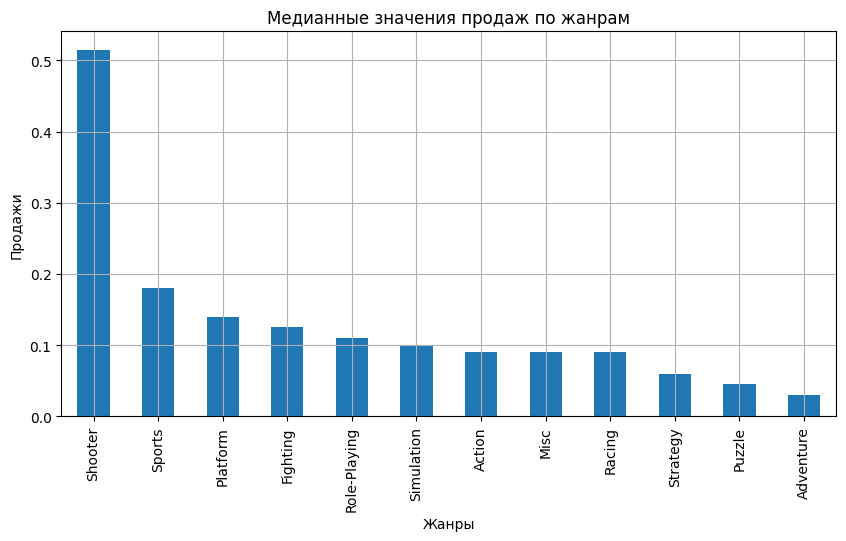

In [73]:
genre_pivot.sort_values(by='total_sales_median', ascending=False).plot(kind='bar', y='total_sales_median', figsize=(10,5), grid=True, title='Медианные значения продаж по жанрам', xlabel='Жанры', ylabel='Продажи', legend='');

🔁Диаграмма медианных значений продаж показала, что явные лидеры продаж это игры в жанре Shooter и Sport. Менее популярные жанры это Puzzle и Adventure.

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Определять прибыльность жанров только по суммарным продажам не совсем корректно, нужно еще учитывать соотношение с количеством выпущенных игр. А лучше сразу рассматривать медианные значения продаж, они являются наиболее объективным показателем прибыльности, так как менее подвержены влиянию выбросов (а в игровой индустрии их достаточно много за счет продаж очень популярных и хитовых игр)</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Добавил в анализ медианные значения и количество проданных игр. Переделал вывод на основании новых результатов по диаграмме медианных значений.
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

##### Вывод

В процессе исследовательского анализа данных были сделаны следующие выводы:
* Наибольшее количество, выпущенных игр за 36 лет, приходится на период с 2005 по 2011 года. Максимальное количество игр выпущено в 2008 году и составляет 1427.
* Явные лидеры продаж по платформам: PS2, X360, PS3, Wii, DS, PS
* У всех платформ, за исключением Wii, прослеживается классический жизненный цикл 'набор оборотов продаж -> пик -> падение продаж'. В отличии от всех у Wii был достаточно 'взрывной' старт продаж, что видно по графику.
* Среднее значение продолжительности жизни консоли - 7.1 лет. С наибольшим жизненным циклом выделяются платформы: GB - 13 лет, NES - 11 лет , PS2 - 11 лет, PSP - 11 лет, DC - 10 лет.
* У компании Nintendo замена на новые платформы хронологически происходила через 7, 6 и 10 лет. Среднее время обновления платформы - 7.6 лет.
* У компании Sega замена на новые платформы хронологически происходила через 3, 1 и 4 года. через 4 года. Среднее время обновления платформы - 2.6 года.
* У компании Sony замена на новые платформы хронологически происходила через 6, 6 и 7 лет. Среднее время обновления платформы - 6.3 года.
* 🔁Оптимально актуальным периодом является 2014 - 2016 года, который позволит нам проанализировать платформы, возникшие не менее 3 лет назад и максимально отсечь устаревшие.
* За актуальный период идет тенденция снижения продаж по всем платформам. Лидирующие позицию держат по убыванию: PS4, XOne, 3DS, PC, PSV и WiiU. Их мы определим как потенциально прибыльные платформы.
* По диаграммам размаха видно множество значений вне квартильных значений. Это значит что у каждой из платформ есть игры с чрезмерно высоким уровнем продаж и игры c минимальными продажами. Самый низкий разброс значений четко виден у платформ PC и PSV.
* 🔁Наблюдается небольшая взаимосвязь между количеством продаж PS4 и оценками критиков (0.4), которую стоит учитывать.
* 🔁Похожая тенденция наблюдается и для платформ 3DS и XOne , а вот у WiiU напротив имеется неплохая взаимосвязь продаж с оценками пользователей (0.4)
* 🔁Диаграмма медианных значений продаж показала, что явные лидеры продаж это игры в жанре Shooter и Sport. Менее популярные жанры это Puzzle и Adventure.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Молодец, что делаешь промежуточные выводы! </div>

## Составление портрета пользователя каждого региона 

##### Портрет пользователя каждого региона (NA, EU, JP)

###### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

**NA регион**

In [74]:
platforms_na = actual_games.pivot_table(index='platform', values='na_sales', aggfunc='sum').reset_index()
platforms_na

,platform,na_sales
0,3DS,22.64
1,PC,7.23
2,PS3,22.05
3,PS4,98.61
4,PSP,0.00
5,PSV,2.52
6,Wii,2.08
7,WiiU,19.36
8,X360,28.30
9,XOne,81.27


In [75]:
top5_platform_na = platforms_na.nlargest(n=5, columns='na_sales')
top5_platform_na

,platform,na_sales
3,PS4,98.61
9,XOne,81.27
8,X360,28.30
0,3DS,22.64
2,PS3,22.05


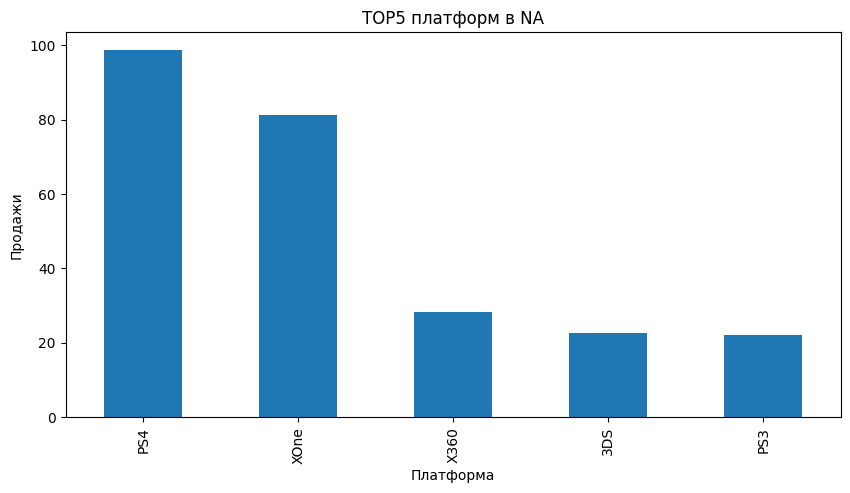

In [76]:
top5_platform_na.plot(kind='bar', x='platform', y='na_sales', figsize=(10,5), title='TOP5 платформ в NA', xlabel='Платформа', ylabel='Продажи', legend=());

🔁Теперь посмотрим на соотношение продаж TOP5 платформ с остальными платформами

,na_sales_percent
category,
PS4,0.347
XOne,0.286
Other,0.109
X360,0.100
3DS,0.080
PS3,0.078


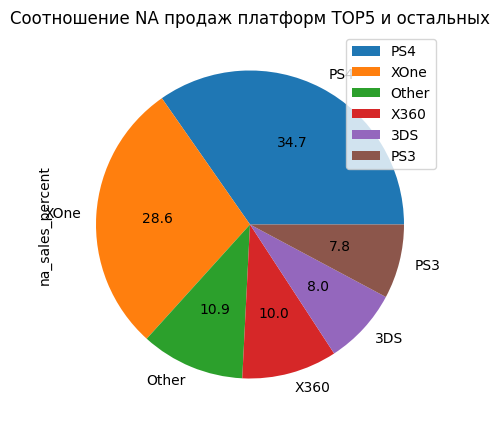

In [77]:
def categorize_platform_na(platform):
    try:
        if platform == 'XOne':
            return 'XOne'
        elif platform == 'PS4':
            return 'PS4'
        elif platform == '3DS':
            return '3DS'
        elif platform == 'PS3':
            return 'PS3'
        elif platform == 'X360':
            return 'X360'
        else:
            return 'Other'
    except:
        pass

platforms_na['category'] = platforms_na['platform'].apply(categorize_platform_na)
platforms_na['na_sales_percent'] = (platforms_na['na_sales'] / platforms_na['na_sales'].sum()).round(3)
category_pivot_eu = platforms_na.pivot_table(index='category', values='na_sales_percent', aggfunc='sum').sort_values(by='na_sales_percent',ascending=False)
category_pivot_eu.sort_values(by='na_sales_percent',ascending=False).plot(kind='pie', y='na_sales_percent', autopct='%.1f', figsize=(10,5), title='Соотношение NA продаж платформ TOP5 и остальных')
category_pivot_eu.sort_values(by='na_sales_percent',ascending=False)

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера 2:</b> 
    

 - Если есть подписи на самом графике, то легенду можно убрать.

 - Значения долей можно отобразить на самой диаграмме с помощью параметра `autopct`</div>

🔁В американском регионе в TOP5 продаж входят PS4, XOne, X360, PS3 и 3DS. Остальные платформы занимают 11% от общего количества продаж.

**EU регион**

In [78]:
platforms_eu = actual_games.pivot_table(index='platform', values='eu_sales', aggfunc='sum').reset_index()
platforms_eu

,platform,eu_sales
0,3DS,16.12
1,PC,17.97
2,PS3,25.54
3,PS4,130.04
4,PSP,0.00
5,PSV,3.53
6,Wii,2.59
7,WiiU,13.15
8,X360,15.49
9,XOne,46.25


In [79]:
top5_platform_eu = platforms_eu.nlargest(n=5, columns='eu_sales')
top5_platform_eu

,platform,eu_sales
3,PS4,130.04
9,XOne,46.25
2,PS3,25.54
1,PC,17.97
0,3DS,16.12


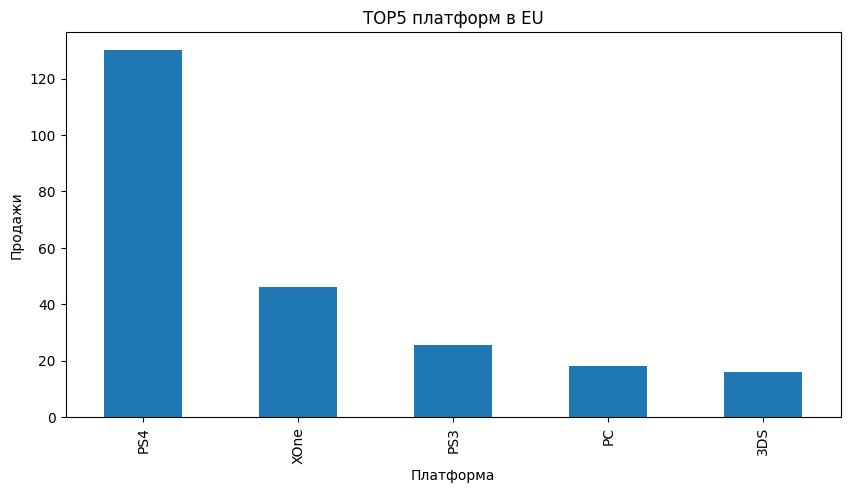

In [80]:
top5_platform_eu.plot(kind='bar', x='platform', y='eu_sales', figsize=(10,5), title='TOP5 платформ в EU', xlabel='Платформа', ylabel='Продажи', legend=());

🔁Теперь посмотрим на соотношение продаж TOP5 платформ с остальными платформами

,eu_sales_percent
category,
PS4,0.480
XOne,0.171
Other,0.129
PS3,0.094
PC,0.066
3DS,0.060


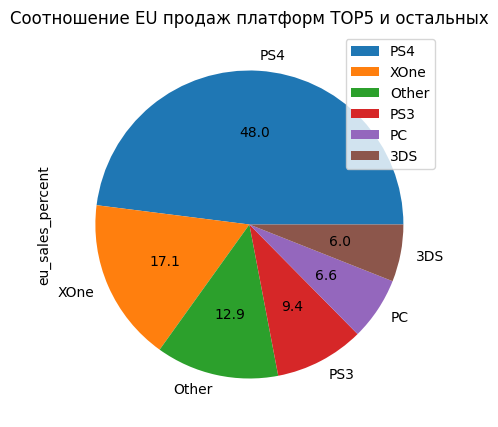

In [81]:
def categorize_platform_eu(platform):
    try:
        if platform == 'XOne':
            return 'XOne'
        elif platform == 'PS4':
            return 'PS4'
        elif platform == '3DS':
            return '3DS'
        elif platform == 'PS3':
            return 'PS3'
        elif platform == 'PC':
            return 'PC'
        else:
            return 'Other'
    except:
        pass

platforms_eu['category'] = platforms_eu['platform'].apply(categorize_platform_eu)
platforms_eu['eu_sales_percent'] = (platforms_eu['eu_sales'] / platforms_eu['eu_sales'].sum()).round(3)
category_pivot_eu = platforms_eu.pivot_table(index='category', values='eu_sales_percent', aggfunc='sum').sort_values(by='eu_sales_percent',ascending=False)
category_pivot_eu.sort_values(by='eu_sales_percent',ascending=False).plot(kind='pie', y='eu_sales_percent', autopct='%.1f', figsize=(10,5), title='Соотношение EU продаж платформ TOP5 и остальных')
category_pivot_eu.sort_values(by='eu_sales_percent',ascending=False)

🔁В европейском регионе В TOP5 продаж входят PS4, XOne, PS3, PC и 3DS. Остальные платформы занимают 12% от общего количества продаж.

**JP регион**

In [82]:
platforms_jp = actual_games.pivot_table(index='platform', values='jp_sales', aggfunc='sum').reset_index()
platforms_jp

,platform,jp_sales
0,3DS,44.24
1,PC,0.00
2,PS3,11.22
3,PS4,15.02
4,PSP,0.36
5,PSV,14.54
6,Wii,0.00
7,WiiU,7.31
8,X360,0.08
9,XOne,0.32


In [83]:
top5_platform_jp = platforms_jp.nlargest(n=5, columns='jp_sales')
top5_platform_jp

,platform,jp_sales
0,3DS,44.24
3,PS4,15.02
5,PSV,14.54
2,PS3,11.22
7,WiiU,7.31


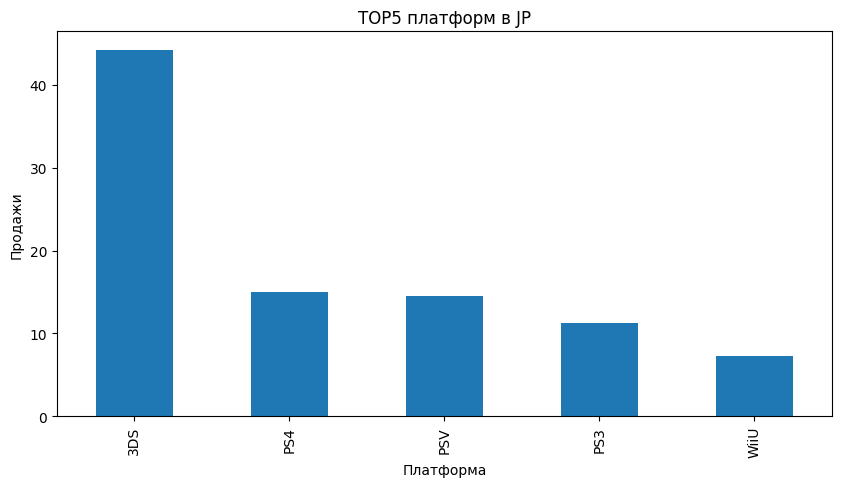

In [84]:
top5_platform_jp.plot(kind='bar', x='platform', y='jp_sales', figsize=(10,5), title='TOP5 платформ в JP', xlabel='Платформа', ylabel='Продажи', legend=());

🔁Теперь посмотрим на соотношение продаж TOP5 платформ с остальными платформами

,jp_sales_percent
category,
3DS,0.475
PS4,0.161
PSV,0.156
PS3,0.121
WiiU,0.079
Other,0.008


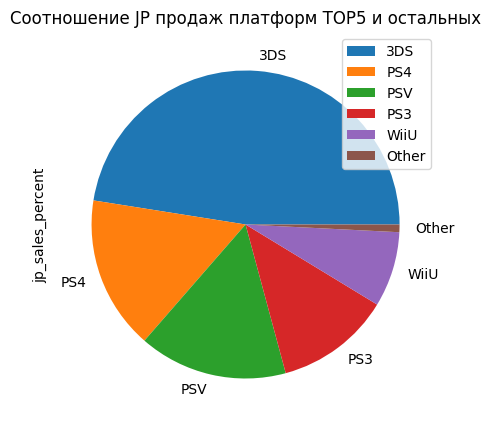

In [85]:
def categorize_platform_jp(platform):
    try:
        if platform == '3DS':
            return '3DS'
        elif platform == 'PS4':
            return 'PS4'
        elif platform == 'PSV':
            return 'PSV'
        elif platform == 'PS3':
            return 'PS3'
        elif platform == 'WiiU':
            return 'WiiU'
        else:
            return 'Other'
    except:
        pass

platforms_jp['category'] = platforms_jp['platform'].apply(categorize_platform_jp)
platforms_jp['jp_sales_percent'] = (platforms_jp['jp_sales'] / platforms_jp['jp_sales'].sum()).round(3)
category_pivot_jp = platforms_jp.pivot_table(index='category', values='jp_sales_percent', aggfunc='sum').sort_values(by='jp_sales_percent',ascending=False)
category_pivot_jp.sort_values(by='jp_sales_percent',ascending=False).plot(kind='pie', y='jp_sales_percent', figsize=(10,5), title='Соотношение JP продаж платформ TOP5 и остальных')
category_pivot_jp.sort_values(by='jp_sales_percent',ascending=False)

🔁В TOP5 лидерах продаж в японском регионе обосновались 3DS, PS4, PSV, PS3 и WiiU . Остальные платформы занимают лишь малый 1% от общего количества продаж.

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
В задании нас просят описать различия в долях продаж по каждому региону (доля каждой платформы из топ-5 от общих продаж в регионе), поэтому здесь стоит построить круговые диаграммы. Выделить на них топ-5, а продажи по остальным платформам объединить в отдельную категорию.
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Сделал выше. В том числе и для других регионов также.
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

###### Самые популярные жанры (топ-5). Поясните разницу.

**NA регион**

In [86]:
genre_na = actual_games.pivot_table(index='genre', values='na_sales', aggfunc='sum')
genre_na

,na_sales
genre,
Action,72.53
Adventure,5.64
Fighting,12.43
Misc,15.05
Platform,6.79
Puzzle,0.65
Racing,8.74
Role-Playing,33.47
Shooter,79.02


In [87]:
top5_genre_na = genre_na.nlargest(n=5, columns='na_sales').reset_index()
top5_genre_na['na_sales_percent'] = (top5_genre_na['na_sales'] / top5_genre_na['na_sales'].sum()).round(2)
top5_genre_na

,genre,na_sales,na_sales_percent
0,Shooter,79.02,0.32
1,Action,72.53,0.29
2,Sports,46.13,0.19
3,Role-Playing,33.47,0.14
4,Misc,15.05,0.06


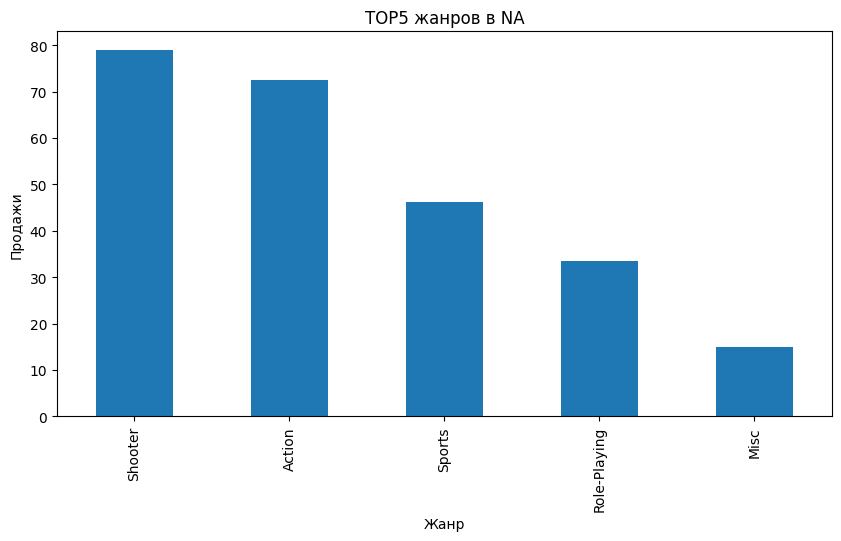

In [88]:
top5_genre_na.plot(kind='bar', x='genre', y='na_sales', figsize=(10,5), title='TOP5 жанров в NA', xlabel='Жанр', ylabel='Продажи', legend=());

В американском регионе лидируют жанры Action, Shooter, Sports.

**EU регион**

In [89]:
genre_eu = actual_games.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
genre_eu

,eu_sales
genre,
Action,74.68
Adventure,6.49
Fighting,6.69
Misc,12.86
Platform,6.80
Puzzle,0.52
Racing,14.13
Role-Playing,28.17
Shooter,65.52


In [90]:
top5_genre_eu = genre_eu.nlargest(n=5, columns='eu_sales').reset_index()
top5_genre_eu['eu_sales_percent'] = (top5_genre_eu['eu_sales'] / top5_genre_eu['eu_sales'].sum()).round(2)
top5_genre_eu

,genre,eu_sales,eu_sales_percent
0,Action,74.68,0.33
1,Shooter,65.52,0.29
2,Sports,45.73,0.20
3,Role-Playing,28.17,0.12
4,Racing,14.13,0.06


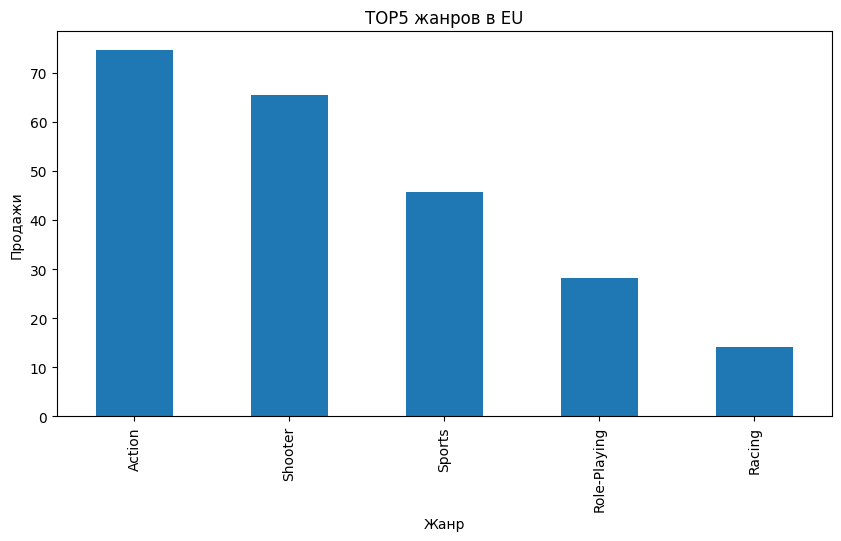

In [91]:
top5_genre_eu.plot(kind='bar', x='genre', y='eu_sales', figsize=(10,5), title='TOP5 жанров в EU', xlabel='Жанр', ylabel='Продажи', legend=());

Тройка наиболее популярных жанров в европейском регионе аналогична американскому - Action, Shooter, Sports.

**JP регион**

In [92]:
genre_jp = actual_games.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
genre_jp

,jp_sales
genre,
Action,29.58
Adventure,3.60
Fighting,6.37
Misc,5.61
Platform,2.69
Puzzle,0.93
Racing,1.76
Role-Playing,31.16
Shooter,4.87


In [93]:
top5_genre_jp = genre_jp.nlargest(n=5, columns='jp_sales').reset_index()
top5_genre_jp['eu_sales_percent'] = (top5_genre_jp['jp_sales'] / top5_genre_jp['jp_sales'].sum()).round(2)
top5_genre_jp

,genre,jp_sales,eu_sales_percent
0,Role-Playing,31.16,0.40
1,Action,29.58,0.38
2,Fighting,6.37,0.08
3,Misc,5.61,0.07
4,Shooter,4.87,0.06


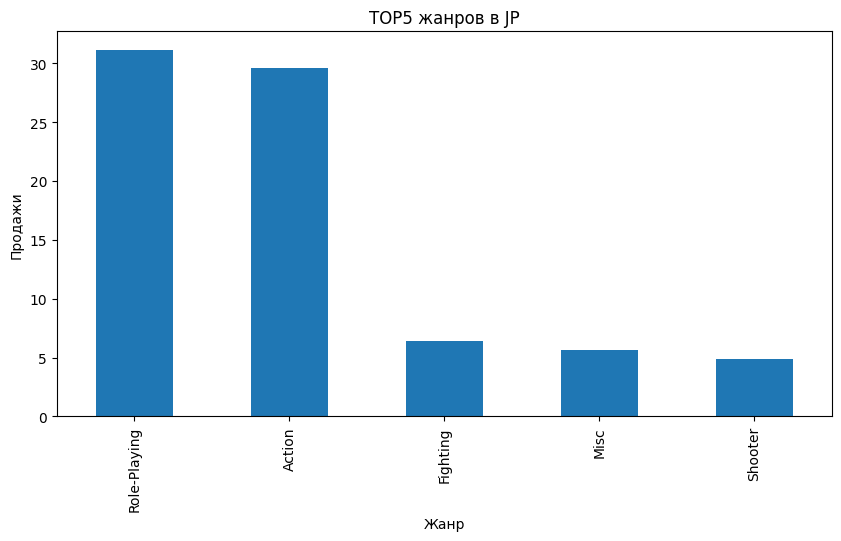

In [94]:
top5_genre_jp.plot(kind='bar', x='genre', y='jp_sales', figsize=(10,5), title='TOP5 жанров в JP', xlabel='Жанр', ylabel='Продажи', legend=());

🔁В японском регионе в тройке лидеров по жанрам - Role-Playing, Action, Fighting.

###### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**NA регион**

In [95]:
rating_na = actual_games.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
rating_na['na_rating_percent'] = (rating_na['na_sales'] / rating_na['na_sales'].sum()).round(2)
rating_na

,na_sales,na_rating_percent
rating,,
M,96.42,0.34
RP,64.72,0.23
E,50.74,0.18
T,38.95,0.14
E10+,33.23,0.12


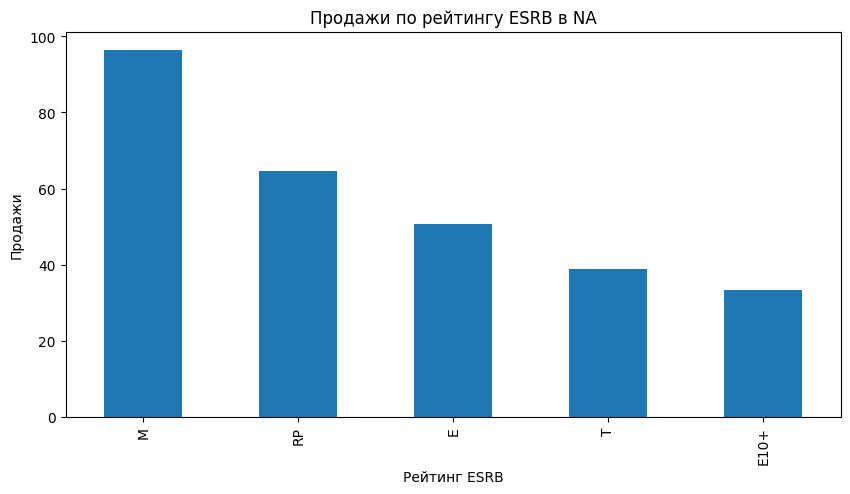

In [96]:
rating_na.plot(kind='bar', y='na_sales', figsize=(10,5), title='Продажи по рейтингу ESRB в NA', xlabel='Рейтинг ESRB', ylabel='Продажи', legend=());

🔁В американском регионе самые большие продажи у категории M, самые маленькие - у категории E10+.

**EU регион**

In [97]:
rating_eu = actual_games.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
rating_eu['eu_rating_percent'] = (rating_eu['eu_sales'] / rating_eu['eu_sales'].sum()).round(2)
rating_eu

,eu_sales,eu_rating_percent
rating,,
M,93.44,0.35
RP,58.95,0.22
E,58.06,0.21
T,34.07,0.13
E10+,26.16,0.10


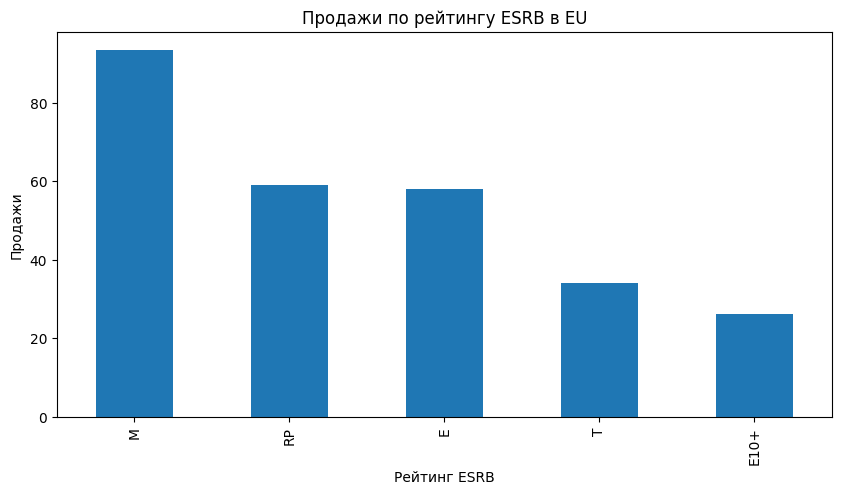

In [98]:
rating_eu.plot(kind='bar', y='eu_sales', figsize=(10,5), title='Продажи по рейтингу ESRB в EU', xlabel='Рейтинг ESRB', ylabel='Продажи', legend=());

🔁В европейском регионе ситуация аналогичная американскому: самые большие продажи у категории M, самые маленькие - у категории E10+.

**JP регион**

In [99]:
rating_jp = actual_games.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
rating_jp['jp_rating_percent'] = (rating_jp['jp_sales'] / rating_jp['jp_sales'].sum()).round(2)
rating_jp

,jp_sales,jp_rating_percent
rating,,
RP,56.90,0.61
T,14.78,0.16
E,8.94,0.10
M,8.01,0.09
E10+,4.46,0.05


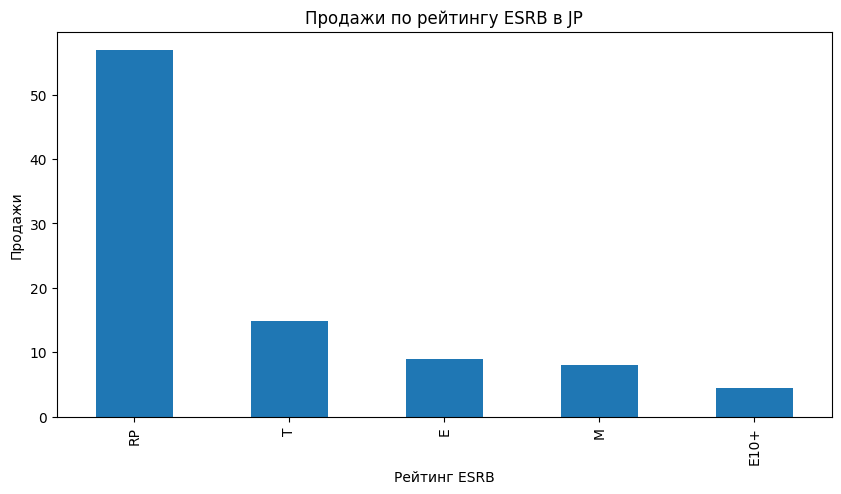

In [100]:
rating_jp.plot(kind='bar', y='jp_sales', figsize=(10,5), title='Продажи по рейтингу ESRB в JP', xlabel='Рейтинг ESRB', ylabel='Продажи', legend=());

🔁В японском регионе самые большие продажи у категории RP, самые маленькие - у категории E10+.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b>

Как ты думаешь, почему в Японии большинство игр не имеют рейтинга ESRB?</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> RP это игры, которым ESRB еще не успела присвоить категорию. Возможно это происходит потому, что многие релизы в Японии выходят быстрее, чем в американском и европейском регионах, а, как мы заметили, японский пользователь как раз в основном и пользуется платформами японского производителя. К тому же ESRB это система категоризации американского региона. Даже при одновременном релизе, организации ESRB требовалось бы время для оценки игры.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Все так, а еще в Японии есть своя рейтинговая система CERO  </div>

##### Вывод

Благодаря проведенному анализу мы можем составить портрет пользователя в каждом из регионов.
* 🔁В NA лидиуют платформы PS4, XOne и X360 с жанрами Action, Shooter, Sports в категории M.
* 🔁В EU лидиуют платформы PS4, XOne и PS3 с жанрами Action, Shooter, Sports в категории M.
* 🔁В JP лидиуют платформы 3DS, PS4 и PSV с жанрами Role-Playing, Action, Fighting в категории RP.

Стоит заметить, что у американского и европейского пользователей практически схожие предпочтения.

## Проверка гипотез

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Определим нулевую и альтернативную гипотезы:
* H0 - средние пользовательские рейтинги платформ Xbox One и PC равны
* H1 - средние пользовательские рейтинги платформ Xbox One и PC различны

Используем двухвыборочный двусторонний t-тест для независимых выборок с уровнем статистической значимости 5%

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Здорово, что формулируешь гипотезы перед проверкой </div>

In [101]:
# для начала подготовим 2 среза и удалим в них все пропущенные nan значения. В противном случае не посчитается p-value.
XOne = actual_games.query('platform == "XOne" ')['user_score'].dropna()
PC = actual_games.query('platform == "PC"')['user_score'].dropna()

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 
    
Кстати, можно не удалять пропуски из сравниваемых выборок, а передать в ttest_ind аргумент nan_policy с нужным значением, тогда они будут игнорироваться. Подробнее можно почитать [здесь](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) </div>

In [102]:
len(XOne)

165

In [103]:
len(PC)

122

Выборки не равны, поэтому будем применять equal_var=False

In [104]:
alpha = 0.05
print('Средний пользовательский рейтинг XOne:', XOne.mean())
print('Средний пользовательский рейтинг PC:', PC.mean())
results = st.ttest_ind(XOne, PC, equal_var=False, alternative='two-sided')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Средний пользовательский рейтинг XOne: 6.594545454545456
Средний пользовательский рейтинг PC: 6.298360655737705
p-значение: 0.11601398086668835
Не отвергаем нулевую гипотезу


На основании теста нулевая гипотеза не может быть отвергнута, значит очень вероятно, что средние пользовательские рейтинги платформ Xbox One и PC равны.

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 
    
Вывод корректнее сформулировать так:

    С большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий

</div>

##### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Определим нулевую и альтернативную гипотезы:
* H0 - средние пользовательские рейтинги жанров Action и Sports равны.
* H1 - средние пользовательские рейтинги жанров Action и Sports не равны.

Используем двухбырочный t-тест для независимых выборок с уровнем статистической значимости 5%

In [105]:
Action = actual_games.query('genre == "Action"')['user_score'].dropna()
Sports = actual_games.query('genre == "Sports"')['user_score'].dropna()

In [106]:
len(Action)

297

In [107]:
len(Sports)

127

Выборки не равны, поэтому будем применять equal_var=False

In [108]:
alpha = 0.05
print('Средний пользовательский рейтинг Action:', Action.mean())
print('Средний пользовательский рейтинг Sports:', Sports.mean())
results = st.ttest_ind(Action, Sports, equal_var=False, alternative='two-sided')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Средний пользовательский рейтинг Action: 6.760606060606061
Средний пользовательский рейтинг Sports: 5.2251968503937
p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


На основании теста нулевая гипотеза может быть отвергнута, значит есть возможность полагать, что средние пользовательские рейтинги жанров Action и Sports не равны.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Гипотезы верно проработаны! </div>

##### Вывод
Были проверены две гипотезы. Ниже представлены результаты проверок:
* Нулевая гипотеза не может быть отвергнута, значит очень вероятно, что средние пользовательские рейтинги платформ Xbox One и PC равны.
* Нулевая гипотеза может быть отвергнута, значит есть возможность полагать, что средние пользовательские рейтинги жанров Action и Sports не равны.

## Общий вывод

В ходе проведения исследования были проделаны следующие этапы:
1. **Загрузка и изучение данных**

Были загружены и просмотрены имеющиеся данные. Обнаружили множество пропущенных значений и некорректный тип данных в столбцах.

2. **Подготовка данных**

В процессе подготовки данных были проделаны следующие действия:
* Привели названия столбцов н нижнему регистру. 
* Проверили все столбцы на неявные дубликаты. 1 был найден и удален.
* Удалены  строки с пропусками в столбцах name, year_of_release, genre. В столбце rating пропуски заменены на категорию RP. Пропуски в critic_score и user_score оставили без изменений, т.к. они занимают больше половины имеющихся данных. 
* Столбцы year_of_release и user_score были приведены к нужным типам.
* Создали новый столбец, показывающий суммарные продажи во всех регионах.

3. **Исследовательский анализ данных**

В процессе исследовательского анализа данных были сделаны следующие выводы:
* Наибольшее количество, выпущенных игр за 36 лет, приходится на период с 2005 по 2011 года. Максимальное количество игр выпущено в 2008 году и составляет 1427.
* Явные лидеры продаж по платформам: PS2, X360, PS3, Wii, DS, PS
* У всех платформ, за исключением Wii, прослеживается классический жизненный цикл 'набор оборотов продаж -> пик -> падение продаж'. В отличии от всех у Wii был достаточно 'взрывной' старт продаж, что видно по графику.
* Среднее значение продолжительности жизни консоли - 7.1 лет. С наибольшим жизненным циклом выделяются платформы: GB - 13 лет, NES - 11 лет , PS2 - 11 лет, PSP - 11 лет, DC - 10 лет.
* У компании Nintendo замена на новые платформы хронологически происходила через 7, 6 и 10 лет. Среднее время обновления платформы - 7.6 лет.
* У компании Sega замена на новые платформы хронологически происходила через 3, 1 и 4 года. через 4 года. Среднее время обновления платформы - 2.6 года.
* У компании Sony замена на новые платформы хронологически происходила через 6, 6 и 7 лет. Среднее время обновления платформы - 6.3 года.
* 🔁Оптимально актуальным периодом является 2014 - 2016 года, который позволит нам проанализировать платформы, возникшие не менее 3 лет назад и максимально отсечь устаревшие.
* За актуальный период идет тенденция снижения продаж по всем платформам. Лидирующие позицию держат по убыванию: PS4, XOne, 3DS, PC, PSV и WiiU. Их мы определим как потенциально прибыльные платформы.
* По диаграммам размаха видно множество значений вне квартильных значений. Это значит что у каждой из платформ есть игры с чрезмерно высоким уровнем продаж и игры c минимальными продажами. Самый низкий разброс значений четко виден у платформ PC и PSV.
* 🔁Наблюдается небольшая взаимосвязь между количеством продаж PS4 и оценками критиков (0.4), которую стоит учитывать.
* 🔁Похожая тенденция наблюдается и для платформ 3DS и XOne , а вот у WiiU напротив имеется неплохая взаимосвязь продаж с оценками пользователей (0.4)
* 🔁Диаграмма медианных значений продаж показала, что явные лидеры продаж это игры в жанре Shooter и Sport. Менее популярные жанры это Puzzle и Adventure.

4. **Составление портрета пользователя каждого региона**

Благодаря проведенному анализу мы можем составить портрет пользователя в каждом из регионов.

* 🔁В NA лидиуют платформы PS4, XOne и X360 с жанрами Action, Shooter, Sports в категории M.
* 🔁В EU лидиуют платформы PS4, XOne и PS3 с жанрами Action, Shooter, Sports в категории M.
* 🔁В JP лидиуют платформы 3DS, PS4 и PSV с жанрами Role-Playing, Action, Fighting в категории RP.

Стоит заметить, что у американского и европейского пользователей практически схожие предпочтения.

5. **Проверка гипотез**

Были проверены две гипотезы. Ниже представлены результаты проверок:
* Нулевая гипотеза не может быть отвергнута, значит очень вероятно, что средние пользовательские рейтинги платформ Xbox One и PC равны.
* Нулевая гипотеза может быть отвергнута, значит есть возможность полагать, что средние пользовательские рейтинги жанров Action и Sports не равны.

Подводя итог, для планирования кампании на 2017 год могу рекомендуется обратить внимание на следующие пункты:
* Сделать ставку на недавно появившиеся перспективные платформы, такие как XOne и PS4, которые только недавно начали набирать обороты в продажах. К сожалению у крупных компаний средний показатель продолжительности жизни консоли около 7 лет, поэтому платформы, находящиеся на рынке более 5 лет неизбежно устареют, а продажи по ним будут падать.
* Сделать упор на игры жанра Action, т.к. данный жанр находится в лидирующих позициях во всех регионах.
* 🔁Очень аккуратно и выборочно использовать показатели пользовательских оценок. Как показали диаграммы распределения и рассчет корреляции, оценки пользователей оказывают влияние лишь на определенные платформы, как например WiiU.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 
    
Очень хороший резюмирующий вывод! Здорово, что были добавлены рекомендации!


**Хочу обратить твое внимание на то, что после исправления замечаний в некоторых пунктах исследования могут измениться результаты, поэтому нужно будет подкорректировать выводы.**</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Денис, благодарю за проверку и советы 🙂. Все замечания были исправлены. Выводы также обновлены соответственно.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Спасибо за комментарии и обратную связь!  </div>